# EDA
Given that our data has been precompiled and cleaned, it is an excellent candidate for EDA!


In [1]:
# Set Up
import pandas as pd
import numpy as np

# Graphing
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,10)
import seaborn as sns
import plotly.express as px

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)


# Loading Data
The following data comes from the 2010 US Census and contains n = 236,459 entries each representing homosexual married couples with the following attributes:
* _at least_ two children
* a father who has worked in the previous year
* a mother between 21 and 35

In [2]:
sample = pd.read_csv('../data/sample.csv')
sample.head()

,KIDCOUNT,boy1st,boy2nd,boys2,girls2,samesex,morekids,blackm,hispm,whitem,...,agem,aged,weeksm,weeksd,wagem,waged,expm,expd,st,rv
0,2,1,0,0,0,0,0,0,0,1,...,27,35,0,16,NaN,72.078303,9,17,63,0.432150
1,2,0,1,0,0,0,0,0,0,1,...,30,28,30,32,25.954494,26.818263,17,13,63,0.378113
2,2,1,0,0,0,0,0,0,0,1,...,27,30,0,52,NaN,24.285571,9,11,63,0.867049
3,2,1,0,0,0,0,0,1,0,0,...,35,36,0,52,NaN,35.210337,15,11,63,0.046637
4,2,0,0,0,1,1,0,0,0,1,...,30,34,22,40,15.608967,18.148450,10,10,63,0.053762


In [3]:
sample.columns.to_list()

['KIDCOUNT',
 'boy1st',
 'boy2nd',
 'boys2',
 'girls2',
 'samesex',
 'morekids',
 'blackm',
 'hispm',
 'whitem',
 'othracem',
 'blackd',
 'hispd',
 'whited',
 'othraced',
 'educm',
 'educd',
 'agefstm',
 'agefstd',
 'workedm',
 'workedd',
 'hrsweekd',
 'hrsweekm',
 'annhrsm',
 'annhrsd',
 'wnhm',
 'wnhd',
 'earningsm',
 'earningsd',
 'faminc',
 'famearn',
 'agem',
 'aged',
 'weeksm',
 'weeksd',
 'wagem',
 'waged',
 'expm',
 'expd',
 'st',
 'rv']

# Let's begin visualizing motherly, fatherly, and family earnings

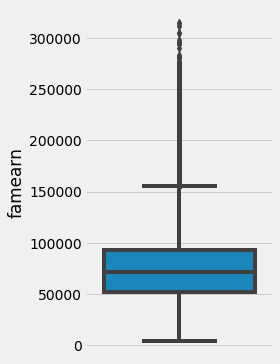

In [16]:
plt.figure(figsize = (3, 6))
sns.boxplot(sample['famearn'], orient = 'v')

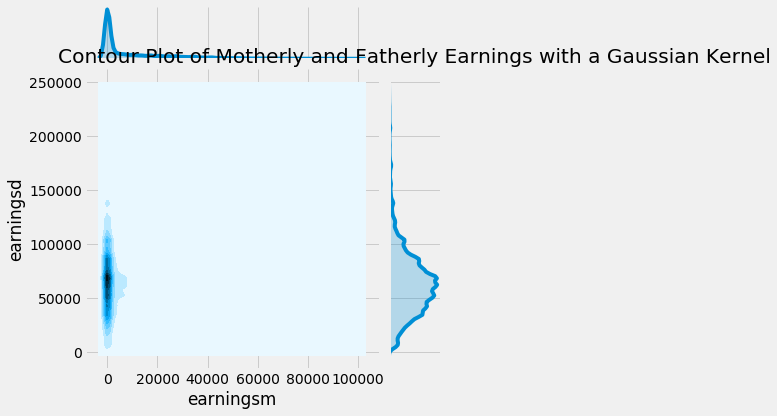

In [22]:
sns.jointplot(data = sample, x = 'earningsm', y = 'earningsd', kind = 'kde')
plt.suptitle('Contour Plot of Motherly and Fatherly Earnings with a Gaussian Kernel', y = 1.05);

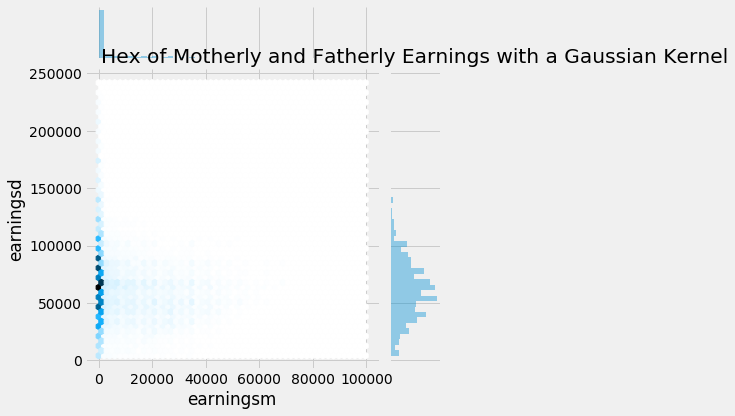

In [23]:
sns.jointplot(data = sample, x = 'earningsm', y = 'earningsd', kind = 'hex')
plt.suptitle('Hex of Motherly and Fatherly Earnings with a Gaussian Kernel');


Both of these plots are not a very easy to read due to many motherly earnings being 0. Let's remove the scatter/hex binning to just observe the univariate distributions.

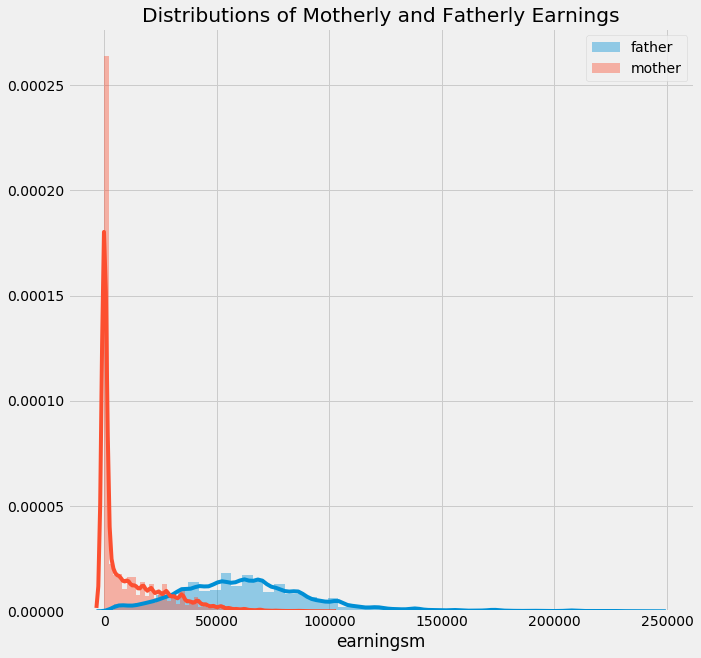

In [26]:
sns.distplot(sample['earningsd'], label = 'father')
sns.distplot(sample['earningsm'], label = 'mother')
plt.title('Distributions of Motherly and Fatherly Earnings')
plt.xlabel('Earnings in USD')
plt.legend();

This makes sense from what we plotted above in the jointplots. Motherly earnings are skewed quite heavily to the right due to the phenomena that most mothers are the homemakers in the family. The father's tend to follow more normal-like observation. Let's consider what a log transformation would do on the families where both the mother and father are working.

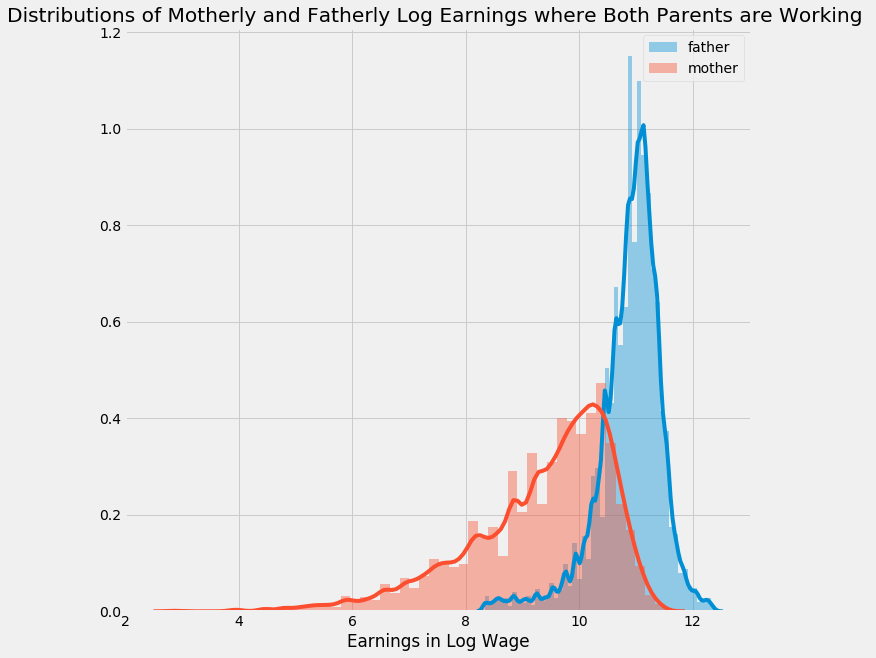

In [57]:
working_subset = sample[(sample['earningsm'] > 0) & (sample['earningsd'] > 0)]

sns.distplot(np.log(working_subset['earningsd']), label = 'father')
sns.distplot(np.log(working_subset['earningsm']), label = 'mother')
plt.title('Distributions of Motherly and Fatherly Log Earnings where Both Parents are Working ')
plt.xlabel('Earnings in Log Wage')
plt.legend();

This is much easier to read. We can see that father's tend to make more which enforces the patriarchial stereotypes that men are the "breadwinners" of a household. Let's see what our jointplot looks like now.

/Users/winsontruong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/winsontruong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


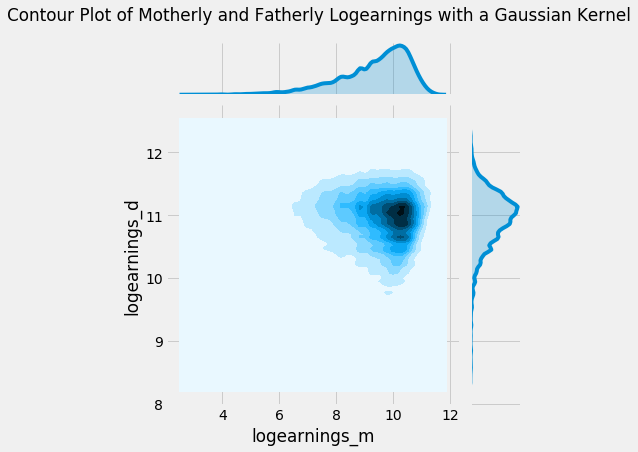

In [58]:

working_subset['logearnings_m'] = np.log(working_subset['earningsm'])
working_subset['logearnings_d'] = np.log(working_subset['earningsd'])

sns.jointplot(data = working_subset, x = 'logearnings_m', y = 'logearnings_d', kind = 'kde')
plt.suptitle('Contour Plot of Motherly and Fatherly Logearnings with a Gaussian Kernel', y = 1.05);

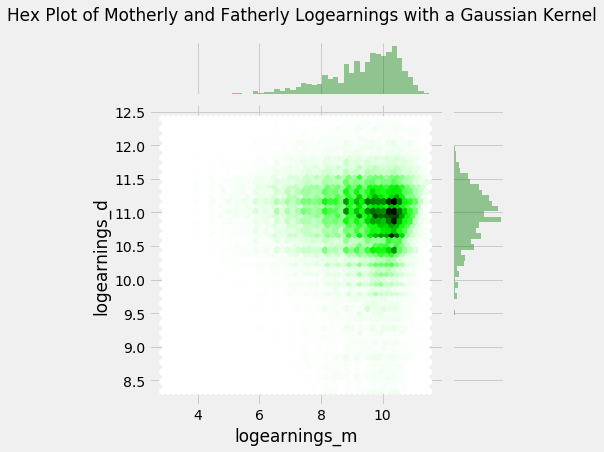

In [59]:
sns.jointplot(data = working_subset, x = 'logearnings_m', y = 'logearnings_d', kind = 'hex', color = 'g')
plt.suptitle('Hex Plot of Motherly and Fatherly Logearnings with a Gaussian Kernel', y = 1.05);

After some cleaning these jointplots are much easier to interpret. Key obsevations
* The most common combination of earnings seem to be mothers that make near 10 log wage points and fathers that make 11 wage points.

# Let's consider the effect of having more kids on family earnings as a whole.

In [28]:
morekids_subsample = sample[sample['morekids'] == 1]

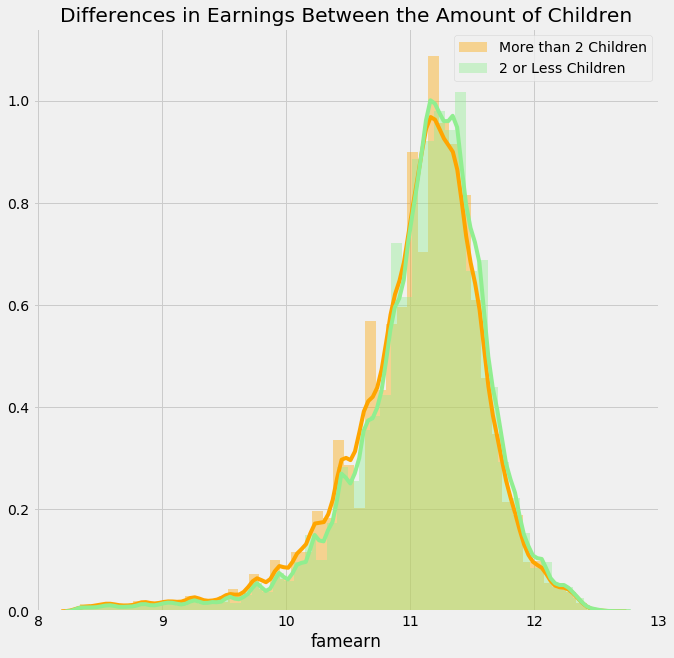

In [55]:
sns.distplot(np.log(morekids_subsample['famearn']), label = 'More than 2 Children', color = 'orange')
sns.distplot(np.log(sample['famearn']), label = '2 or Less Children', color = 'lightgreen')
plt.title('Differences in Earnings Between the Amount of Children')
plt.legend();